Loading data...

Column names in each dataset:

Customers columns: ['CustomerID', 'CustomerName', 'Region', 'SignupDate']
Products columns: ['ProductID', 'ProductName', 'Category', 'Price']
Transactions columns: ['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price']

--- Exploratory Data Analysis (EDA) ---

Basic Info:

Customers DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Products DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column

C:\Users\jayap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


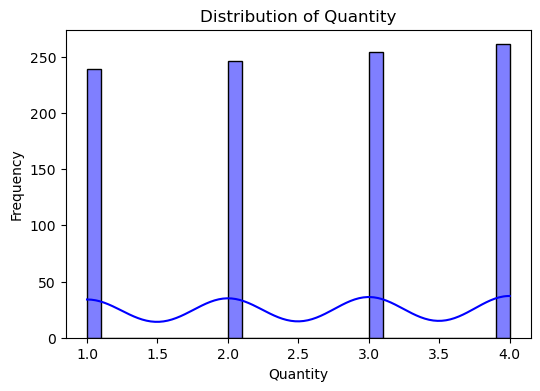

C:\Users\jayap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


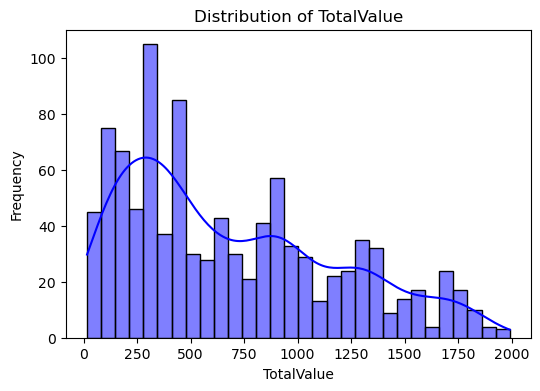

C:\Users\jayap\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


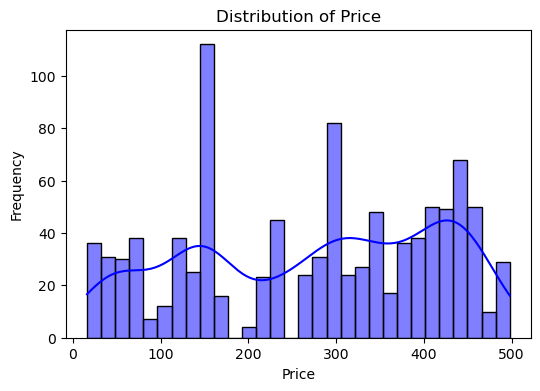


Correlation Heatmap for Transactions:
An error occurred during EDA: could not convert string to float: 'T00001'


<Figure size 1000x600 with 0 Axes>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics.pairwise import cosine_similarity
import datetime
import os

def load_and_clean_data():
    try:
        
        customers_df = pd.read_csv('Customers.csv')
        products_df = pd.read_csv('Products.csv')
        transactions_df = pd.read_csv('Transactions.csv')
        
        
        print("\nColumn names in each dataset:")
        print("\nCustomers columns:", customers_df.columns.tolist())
        print("Products columns:", products_df.columns.tolist())
        print("Transactions columns:", transactions_df.columns.tolist())
        
        # Convert date columns to datetime
        customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
        transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
        
        return customers_df, products_df, transactions_df
    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None


def perform_eda(customers_df, products_df, transactions_df):
    try:
        print("\n--- Exploratory Data Analysis (EDA) ---")
        
        # 1. Basic Info
        print("\nBasic Info:")
        print("\nCustomers DataFrame Info:")
        print(customers_df.info())
        print("\nProducts DataFrame Info:")
        print(products_df.info())
        print("\nTransactions DataFrame Info:")
        print(transactions_df.info())
        
        # 2. Descriptive Statistics
        print("\nDescriptive Statistics:")
        print("\nCustomers:")
        print(customers_df.describe(include='all'))
        print("\nProducts:")
        print(products_df.describe(include='all'))
        print("\nTransactions:")
        print(transactions_df.describe(include='all'))
        
        # 3. Checking Missing Values
        print("\nMissing Values:")
        print("\nCustomers:")
        print(customers_df.isnull().sum())
        print("\nProducts:")
        print(products_df.isnull().sum())
        print("\nTransactions:")
        print(transactions_df.isnull().sum())
        
        # 4. Unique Values
        print("\nUnique Value Counts:")
        print("\nCustomers:")
        print(customers_df.nunique())
        print("\nProducts:")
        print(products_df.nunique())
        print("\nTransactions:")
        print(transactions_df.nunique())
        
        # 5. Distribution of Numeric Data
        print("\nVisualizing Distributions...")
        numeric_columns = transactions_df.select_dtypes(include=[np.number]).columns.tolist()
        
        for col in numeric_columns:
            plt.figure(figsize=(6, 4))
            sns.histplot(transactions_df[col], kde=True, bins=30, color='blue')
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()
        
        # 6. Correlation Heatmap
        print("\nCorrelation Heatmap for Transactions:")
        plt.figure(figsize=(10, 6))
        sns.heatmap(transactions_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
        plt.title("Correlation Heatmap")
        plt.show()
        
        # 7. Time Trends
        print("\nVisualizing Time Trends:")
        transactions_df['YearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')
        monthly_revenue = transactions_df.groupby('YearMonth')['TotalValue'].sum()
        plt.figure(figsize=(10, 6))
        monthly_revenue.plot(kind='line', marker='o', color='green')
        plt.title("Monthly Revenue Trend")
        plt.xlabel("Year-Month")
        plt.ylabel("Total Revenue")
        plt.show()
        
        # 8. Categorical Analysis
        print("\nAnalyzing Categories:")
        if 'Category' in products_df.columns:
            plt.figure(figsize=(8, 5))
            sns.countplot(data=products_df, x='Category', order=products_df['Category'].value_counts().index, palette='viridis')
            plt.title("Product Categories Distribution")
            plt.xticks(rotation=45)
            plt.show()
    except Exception as e:
        print(f"An error occurred during EDA: {e}")


# Main Execution
print("Loading data...")
customers_df, products_df, transactions_df = load_and_clean_data()

# If data is loaded successfully, perform EDA
if customers_df is not None and products_df is not None and transactions_df is not None:
    perform_eda(customers_df, products_df, transactions_df)


Data loaded successfully!

=== Basic Dataset Statistics ===

Customers Dataset:
Total customers: 200
Regions represented: {'South America': 59, 'Europe': 50, 'North America': 46, 'Asia': 45}

Customer signup date range:
First signup: 2022-01-22 00:00:00
Last signup: 2024-12-28 00:00:00

Products Dataset:
Total products: 100
Categories available: ['Books', 'Electronics', 'Home Decor', 'Clothing']

Price statistics:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64

Transactions Dataset:
Total transactions: 1000

Transaction value statistics:
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64

Transaction date range:
First transaction: 2023-12-30 15:29:12
Last transaction: 2024-12-28 11:00:00


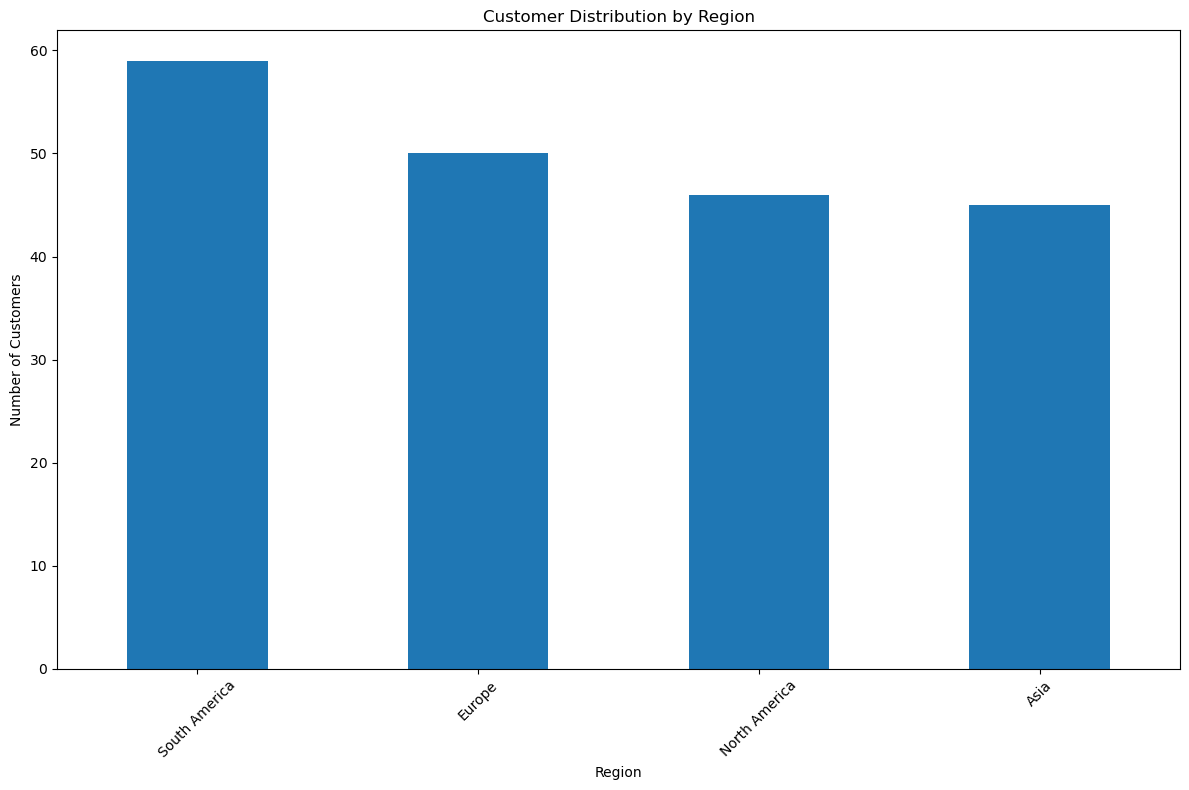

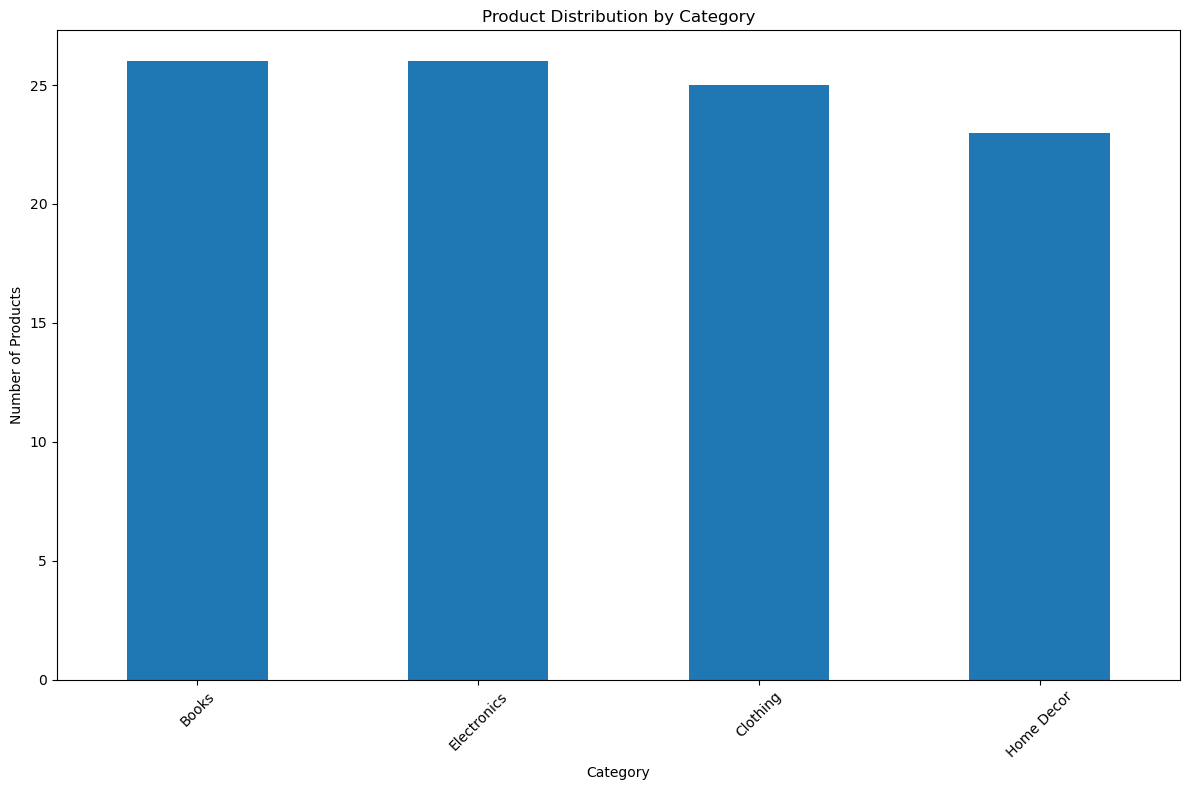

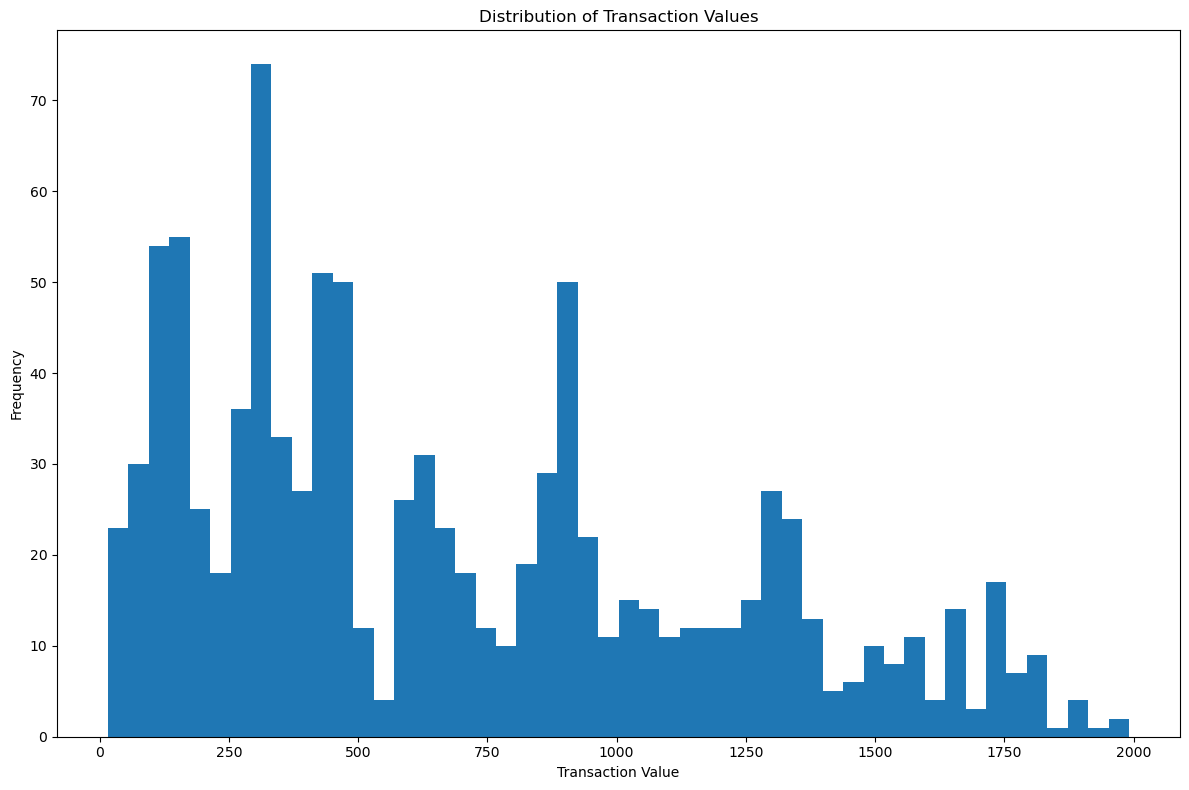

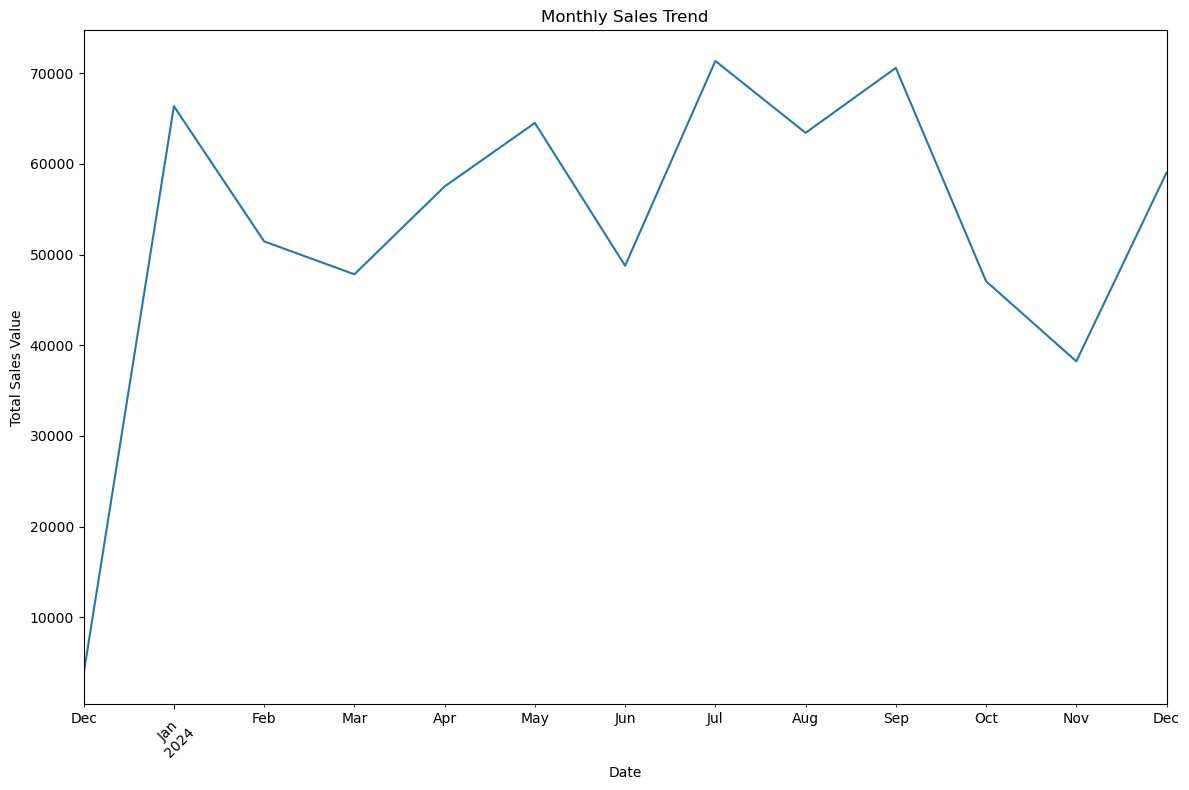

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Basic plot settings
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

def load_data():
    """Load and prepare the datasets"""
    try:
        
        customers_df = pd.read_csv('Customers.csv')
        products_df = pd.read_csv('Products.csv')
        transactions_df = pd.read_csv('Transactions.csv')
        
        
        customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
        transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
        
        print("Data loaded successfully!")
        return customers_df, products_df, transactions_df
    
    except FileNotFoundError as e:
        print(f"Error: {e}")
        print("Please ensure the CSV files are in the current working directory.")
        return None, None, None

def basic_eda(customers_df, products_df, transactions_df):
    """Perform basic exploratory data analysis"""
    
    print("\n=== Basic Dataset Statistics ===")
    
    print("\nCustomers Dataset:")
    print(f"Total customers: {len(customers_df)}")
    print(f"Regions represented: {customers_df['Region'].value_counts().to_dict()}")
    print("\nCustomer signup date range:")
    print(f"First signup: {customers_df['SignupDate'].min()}")
    print(f"Last signup: {customers_df['SignupDate'].max()}")
    
    print("\nProducts Dataset:")
    print(f"Total products: {len(products_df)}")
    print(f"Categories available: {products_df['Category'].unique().tolist()}")
    print("\nPrice statistics:")
    print(products_df['Price'].describe())
    
    print("\nTransactions Dataset:")
    print(f"Total transactions: {len(transactions_df)}")
    print("\nTransaction value statistics:")
    print(transactions_df['TotalValue'].describe())
    print("\nTransaction date range:")
    print(f"First transaction: {transactions_df['TransactionDate'].min()}")
    print(f"Last transaction: {transactions_df['TransactionDate'].max()}")

def create_visualizations(customers_df, products_df, transactions_df):
    """Create basic visualizations"""
    
    #  Customer Region Distribution
    plt.figure(1)
    customers_df['Region'].value_counts().plot(kind='bar')
    plt.title('Customer Distribution by Region')
    plt.xlabel('Region')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    #  Product Category Distribution
    plt.figure(2)
    products_df['Category'].value_counts().plot(kind='bar')
    plt.title('Product Distribution by Category')
    plt.xlabel('Category')
    plt.ylabel('Number of Products')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    #  Transaction Value Distribution
    plt.figure(3)
    plt.hist(transactions_df['TotalValue'], bins=50)
    plt.title('Distribution of Transaction Values')
    plt.xlabel('Transaction Value')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()
    
    #  Monthly Sales Trend
    monthly_sales = transactions_df.set_index('TransactionDate')\
        .resample('M')['TotalValue'].sum()
    
    plt.figure(4)
    monthly_sales.plot(kind='line')
    plt.title('Monthly Sales Trend')
    plt.xlabel('Date')
    plt.ylabel('Total Sales Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def generate_business_insights(customers_df, products_df, transactions_df):
    """Generate key business insights"""
    
    # Merge datasets for analysis
    enriched_transactions = transactions_df.merge(
        products_df[['ProductID', 'Category']], on='ProductID'
    ).merge(
        customers_df[['CustomerID', 'Region']], on='CustomerID'
    )
    
   
    customer_metrics = transactions_df.groupby('CustomerID').agg({
        'TransactionID': 'count',
        'TotalValue': ['sum', 'mean']
    }).round(2)
    
    
    category_performance = enriched_transactions.groupby('Category').agg({
        'TotalValue': 'sum',
        'TransactionID': 'count'
    }).sort_values('TotalValue', ascending=False)
    
    
    regional_performance = enriched_transactions.groupby('Region').agg({
        'TotalValue': 'sum',
        'CustomerID': 'nunique'
    }).sort_values('TotalValue', ascending=False)
    
    return {
        'customer_metrics': customer_metrics,
        'category_performance': category_performance,
        'regional_performance': regional_performance
    }


if __name__ == "__main__":
    
    customers_df, products_df, transactions_df = load_data()
    
    if customers_df is not None:
        
        basic_eda(customers_df, products_df, transactions_df)
        
       
        create_visualizations(customers_df, products_df, transactions_df)
        
       
        insights = generate_business_insights(customers_df, products_df, transactions_df)